In [1]:
# Load dataset
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


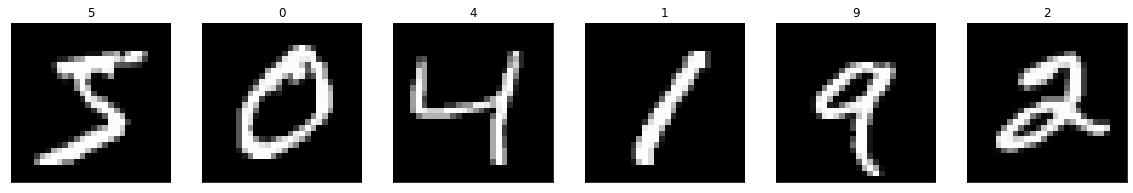

In [2]:
# Visualize 1st six imgs
import matplotlib.cm as cm

fig = plt.figure(figsize=(20, 20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

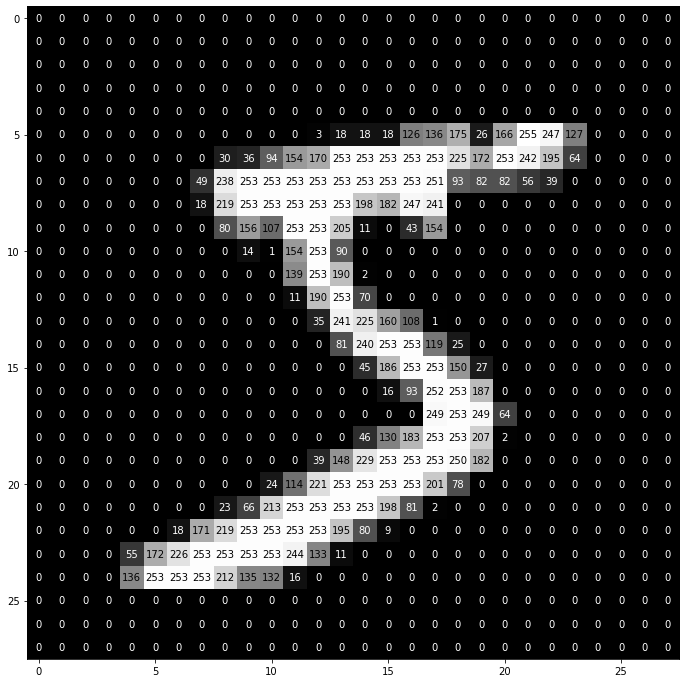

In [3]:
# View an img in more detail
def visualize_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max() / 2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), 
                  xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y] < thresh else 'black' )


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
img = X_train[0]

visualize_input(img, ax)

In [4]:
# Normalize data
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)

In [5]:
# One-hot encoding
from keras.utils import np_utils

num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# Reshape img from 28x28 to 28x28x1
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print("Input shape: ", input_shape)
print("X_train shape: ", X_train.shape)

Input shape:  (28, 28, 1)
X_train shape:  (60000, 28, 28, 1)


In [7]:
# Define model
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()

# C1
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh', 
                 input_shape=input_shape, padding='same'))

# S2
model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))

# C3
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh',
                 padding='valid'))

# S4
model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))

# C5
model.add(Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh', 
                padding='valid'))

model.add(Flatten())

model.add(Dense(units=84, activation='tanh'))

model.add(Dense(units=10, activation='softmax'))


In [8]:
# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [9]:
# Train
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def lr_schedule(epoch):
  if epoch <= 2:
    lr = 5e-4
  elif epoch > 2 and epoch <= 5:
    lr = 2e-4
  elif epoch > 5 and epoch <= 9:
    lr = 5e-5
  else:
    lr = 1e-5
  return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
checkpoint = ModelCheckpoint(filepath='model.hdf5', monitor='val_acc', 
                             verbose=1, save_best_only=True)
callbacks = [checkpoint, lr_scheduler]
hist = model.fit(X_train, y_train, batch_size=32, epochs=20,
                 validation_data=(X_test, y_test), 
                 callbacks=callbacks,
                 verbose=2, shuffle=True)

Epoch 1/20
1875/1875 - 37s - loss: 0.2359 - accuracy: 0.9315 - val_loss: 0.0956 - val_accuracy: 0.9690
Epoch 2/20
1875/1875 - 5s - loss: 0.0762 - accuracy: 0.9769 - val_loss: 0.0529 - val_accuracy: 0.9826
Epoch 3/20
1875/1875 - 4s - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0527 - val_accuracy: 0.9837
Epoch 4/20
1875/1875 - 5s - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.0338 - val_accuracy: 0.9896
Epoch 5/20
1875/1875 - 4s - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 6/20
1875/1875 - 4s - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.0316 - val_accuracy: 0.9891
Epoch 7/20
1875/1875 - 4s - loss: 0.0177 - accuracy: 0.9951 - val_loss: 0.0295 - val_accuracy: 0.9906
Epoch 8/20
1875/1875 - 5s - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.0290 - val_accuracy: 0.9905
Epoch 9/20
1875/1875 - 5s - loss: 0.0155 - accuracy: 0.9959 - val_loss: 0.0286 - val_accuracy: 0.9907
Epoch 10/20
1875/1875 - 5s - loss: 0.0146 - accuracy: 0.9964 - val_loss: 0.0282 -

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]

print("Accuracy: %.4f%%" %accuracy)

Accuracy: 99.1200%


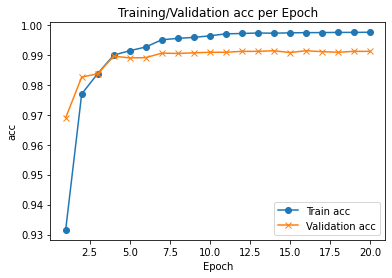

In [11]:
# Plot accuracy
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc=0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

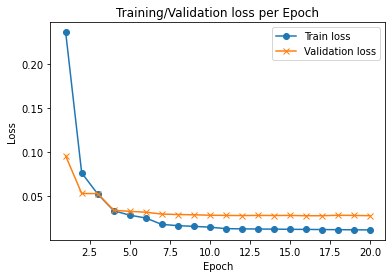

In [12]:
# Plot loss
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc=0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()